In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar el archivo CSV
df = pd.read_csv('defweb23.csv', delimiter=';', quotechar='"')

In [3]:
# Asegurarse de que CUENTA es numérico
df['CUENTA'] = pd.to_numeric(df['CUENTA'])

In [4]:
# Cargar el diccionario de códigos para CAUSA desde el archivo XLSX
causas_dic = pd.read_excel('descdef1.xlsx', sheet_name="CODMUER")
causas_dic = causas_dic[["CODIGO", "VALOR"]].dropna()
causas_dic.columns = ["causa", "descripcion"]

In [5]:
# Crear mapping para CAUSA
causa_mapping = dict(zip(causas_dic['causa'], causas_dic['descripcion']))

In [6]:
# Mapping para SEXO
sexo_mapping = {1: 'Varón', 2: 'Mujer', 9: 'Sin especificar'}

In [7]:
# Aplicar mapping a SEXO
df['SEXO_descripcion'] = df['SEXO'].map(sexo_mapping)

In [8]:
# Extraer descripción de GRUPEDAD
df['GRUPEDAD_descripcion'] = df['GRUPEDAD'].str.split('_', expand=True)[1]

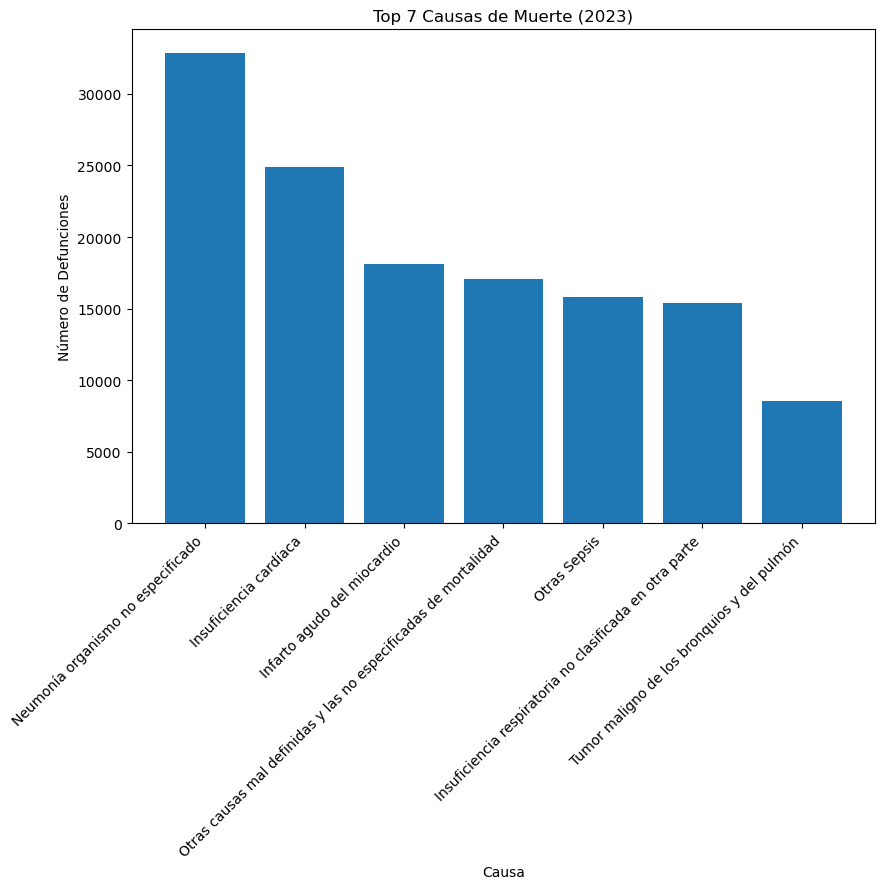

In [9]:
# Top 5 causas de muerte
top_causes = df.groupby('CAUSA')['CUENTA'].sum().sort_values(ascending=False).head(7)
labels = [causa_mapping.get(code, code) for code in top_causes.index]
values = top_causes.values

# Visualizar top 5 causas con descripciones
plt.figure(figsize=(9, 9))
plt.bar(labels, values)
plt.title('Top 7 Causas de Muerte (2023)')
plt.xlabel('Causa')
plt.ylabel('Número de Defunciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
# Total de defunciones por sexo
deaths_by_sex = df.groupby('SEXO_descripcion')['CUENTA'].sum()
print("\nTotal de defunciones por sexo:")
print(deaths_by_sex)


Total de defunciones por sexo:
SEXO_descripcion
Mujer              174490
Sin especificar        55
Varón              178883
Name: CUENTA, dtype: int64


In [12]:
# Total de defunciones por sexo (formato alternativo)
from IPython.display import display, Markdown

deaths_by_sex = df.groupby('SEXO_descripcion')['CUENTA'].sum()

# Crear tabla markdown con emojis y formato
tabla_md = f"""
## 🔍 Total de Defunciones por Sexo (Argentina, 2023)

| Sexo             | Total de Defunciones |
|------------------|----------------------|
|  Mujer         | {deaths_by_sex.get('Mujer', 0):,}              |
| Sin especificar | {deaths_by_sex.get('Sin especificar', 0):,}                   |
| Varón           | {deaths_by_sex.get('Varón', 0):,}              |

> 🔎 Observación: Se observa mayor mortalidad en varones.  
> ⚠️ Registros sin especificar sexo: {deaths_by_sex.get('Sin especificar', 0)}.
"""

display(Markdown(tabla_md))



## 🔍 Total de Defunciones por Sexo (Argentina, 2023)

| Sexo             | Total de Defunciones |
|------------------|----------------------|
|  Mujer         | 174,490              |
| Sin especificar | 55                   |
| Varón           | 178,883              |

> 🔎 Observación: Se observa mayor mortalidad en varones.  
> ⚠️ Registros sin especificar sexo: 55.


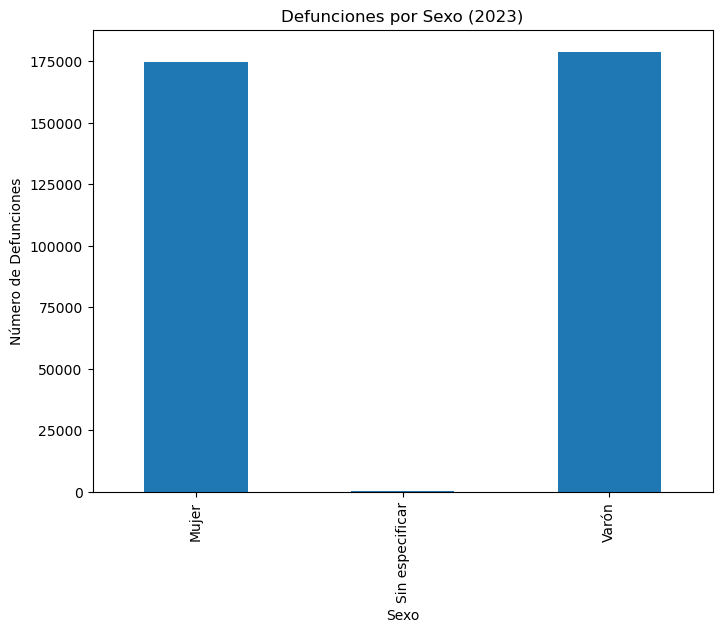

In [61]:
# Visualizar defunciones por sexo
plt.figure(figsize=(8, 6))
deaths_by_sex.plot(kind='bar')
plt.title('Defunciones por Sexo (2023)')
plt.xlabel('Sexo')
plt.ylabel('Número de Defunciones')
plt.show()

In [62]:
# Defunciones maternas
maternal_deaths = df[df['MAT'] != 'NULL']['CUENTA'].sum()
print("\nTotal de defunciones maternas:", maternal_deaths)


Total de defunciones maternas: 353428


In [63]:
# Defunciones por grupo de edad
deaths_by_age = df.groupby('GRUPEDAD_descripcion')['CUENTA'].sum().sort_values(ascending=False).head(10)
print("\nDefunciones por grupo de edad:")
print(deaths_by_age)


Defunciones por grupo de edad:
GRUPEDAD_descripcion
80 y más    142165
75 a 79      47366
70 a 74      41289
65 a 69      32702
60 a 64      23474
55 a 59      15827
50 a 54      11348
45 a 49       8598
40 a 44       6393
35 a 39       4467
Name: CUENTA, dtype: int64


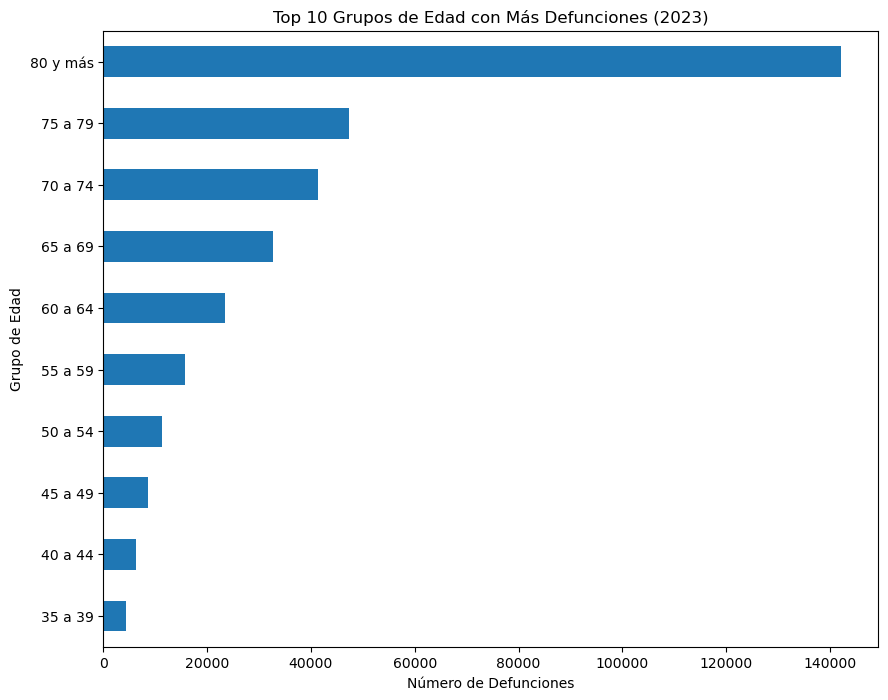

In [64]:
# Visualizar defunciones por grupo de edad (horizontal para mejor legibilidad)
plt.figure(figsize=(10, 8))
deaths_by_age.plot(kind='barh')
plt.title('Top 10 Grupos de Edad con Más Defunciones (2023)')
plt.xlabel('Número de Defunciones')
plt.ylabel('Grupo de Edad')
plt.gca().invert_yaxis()  # Para que el mayor esté arriba
plt.show()

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Contar valores faltantes por columna
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({
    "Faltantes": missing_count,
    "% del total": missing_percent.round(2)
}).sort_values("Faltantes", ascending=False)

# Mostrar como tabla 
tabla_md = "## 🧼 Valores Faltantes por Columna\n\n"
tabla_md += "| Columna | Valores faltantes | % del total |\n"
tabla_md += "|---------|--------------------|--------------|\n"
for col, row in missing_df.iterrows():
    tabla_md += f"| {col} | {row['Faltantes']} | {row['% del total']}% |\n"

display(Markdown(tabla_md))

## 🧼 Valores Faltantes por Columna

| Columna | Valores faltantes | % del total |
|---------|--------------------|--------------|
| MAT | 48988.0 | 99.68% |
| PROVRES | 0.0 | 0.0% |
| SEXO | 0.0 | 0.0% |
| CAUSA | 0.0 | 0.0% |
| GRUPEDAD | 0.0 | 0.0% |
| CUENTA | 0.0 | 0.0% |
| SEXO_descripcion | 0.0 | 0.0% |
| GRUPEDAD_descripcion | 0.0 | 0.0% |
